In [53]:
#adding in new genes to analysis 22q11.2

In [54]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from matplotlib import pyplot as plt
import ants
import os
from tqdm import tqdm
import statistics
import statsmodels.api as sm

In [55]:
cd ../Data/Genemaps

[Errno 2] No such file or directory: '../Data/Genemaps'
/mmfs1/data/pijarj/BC-ORG-Data/Data/Genemaps


In [56]:
#read in symptom patient data and slice out important columns
df = pd.read_csv('/mmfs1/data/pijarj/Data4Julianna/df_patients_S699.csv')
df.columns
df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']]

,ados_total,ados_comm,ados_social,ados_rrb
0,18.0,6.0,12.0,2.0
1,NaN,NaN,NaN,NaN
2,13.0,4.0,9.0,NaN
3,12.0,4.0,8.0,2.0
4,16.0,5.0,11.0,3.0
...,...,...,...,...
694,NaN,NaN,NaN,NaN
695,NaN,NaN,NaN,NaN
696,13.0,4.0,9.0,2.0
697,8.0,2.0,6.0,2.0


In [57]:
#load in diffmat data
atlas = ants.image_read('../../YeoAtlas/Atlas_parc-7n_2mm.nii')
diffmat = np.load('/mmfs1/data/pijarj/Data4Julianna/recon_asd_diffmats.npz')
diffmat = diffmat['data']
diffmat.shape

(699, 51, 51)

In [58]:
genemaps = [file for file in os.listdir() if file.endswith('.nii.gz')]
genemaps.sort()

In [59]:
nsubjects = 699
ngenes = len(genemaps)
print(nsubjects)
print(ngenes)

gene_fmri_corr = np.zeros((ngenes,nsubjects))
gene_fmri_corr

699
37


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
for g in tqdm(range(ngenes)):
    gene_im = ants.image_read(genemaps[g])
    gene_flat = gene_im.numpy().flatten()
    atlas_flat = atlas.numpy().flatten()
    roi_expression = np.array([gene_flat[atlas_flat==roi].mean() for roi in np.arange(1,52)])
    gene_sim = np.zeros((51,51))
    for i in range(51):
        for j in range(51):
            gene_sim[i,j] = abs(roi_expression[i]-roi_expression[j])

    triu = np.triu_indices(51,k=1)
    gene_vec = gene_sim[triu]

    for s in range(nsubjects):
        subject_diffmat = diffmat[s,:,:] # correlation matrices for one subject
        fmri_vec = subject_diffmat[triu]
        data = np.corrcoef(gene_vec,fmri_vec)[0,1]
        gene_fmri_corr[g,s] = data

100%|██████████| 37/37 [00:04<00:00,  9.03it/s]


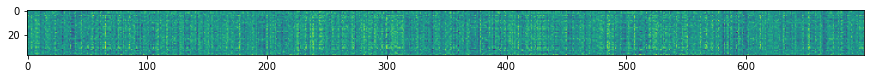

In [61]:
plt.figure(figsize=(15,10))
plt.imshow(gene_fmri_corr)

In [62]:
gene_fmri_corr.shape

(37, 699)

In [63]:
col_id = 0
Y_total = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_total = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_total = ~np.isnan(Y_total)[:,col_id]
Y_use_total = Y_total[good_subjects_total,col_id] 
X_use_total = gene_fmri_corr[:,good_subjects_total]
X_use_total = X_use_total.transpose()
regression_total =  linear_model.LinearRegression(normalize=True)
linear_regression_total = regression_total.fit(X_use_total,Y_use_total) 
Y_use_hat_total = linear_regression_total.predict(X_use_total)

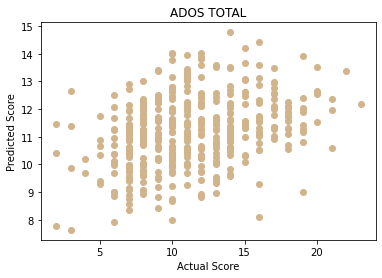

In [64]:
#scatter plot for ados_total
plt.scatter(Y_use_total,Y_use_hat_total,color='tan')
plt.title('ADOS TOTAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [65]:
col_id = 1
Y_comm = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_comm = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_comm = ~np.isnan(Y_comm)[:,col_id]
Y_use_comm = Y_comm[good_subjects_comm,col_id] 
X_use_comm = gene_fmri_corr[:,good_subjects_comm]
X_use_comm = X_use_comm.transpose()
regression_comm =  linear_model.LinearRegression(normalize=True)
linear_regression_comm = regression_comm.fit(X_use_comm,Y_use_comm) 
Y_use_hat_comm = linear_regression_comm.predict(X_use_comm)

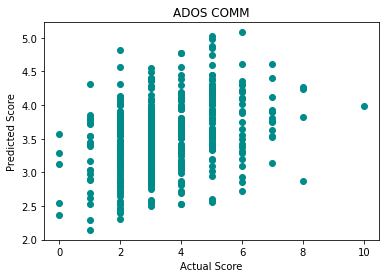

In [66]:
#scatter plot for ados_comm
plt.scatter(Y_use_comm,Y_use_hat_comm,color='darkcyan')
plt.title('ADOS COMM')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [67]:
col_id = 2
Y_social = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_social = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_social = ~np.isnan(Y_social)[:,col_id]
Y_use_social = Y_social[good_subjects_social,col_id] 
X_use_social = gene_fmri_corr[:,good_subjects_social]
X_use_social = X_use_social.transpose()
regression_social =  linear_model.LinearRegression(normalize=True)
linear_regression_social = regression_social.fit(X_use_social,Y_use_social) 
Y_use_hat_social = linear_regression_social.predict(X_use_social)

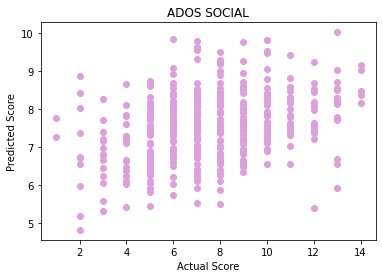

In [68]:
#scatter plot for ados_social
plt.scatter(Y_use_social,Y_use_hat_social,color='plum')
plt.title('ADOS SOCIAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [69]:
col_id = 3
Y_rrb = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_rrb = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_rrb = ~np.isnan(Y_rrb)[:,col_id]
Y_use_rrb = Y_rrb[good_subjects_rrb,col_id] 
X_use_rrb = gene_fmri_corr[:,good_subjects_rrb]
X_use_rrb = X_use_rrb.transpose()
regression_rrb =  linear_model.LinearRegression(normalize=True)
linear_regression_rrb = regression_rrb.fit(X_use_rrb,Y_use_rrb) 
Y_use_hat_rrb = linear_regression_rrb.predict(X_use_rrb)

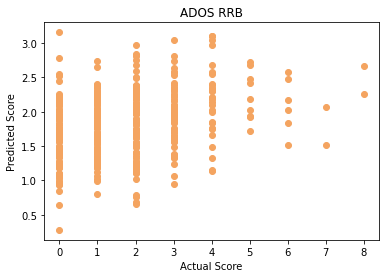

In [70]:
#scatter plot for ados_rrb
plt.scatter(Y_use_rrb,Y_use_hat_rrb,color='sandybrown')
plt.title('ADOS RRB')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [71]:
#variance explained for ados_total
from sklearn.metrics import explained_variance_score
total = explained_variance_score(Y_use_total,Y_use_hat_total)*100
print(total)

10.490944349217134


In [72]:
#variance explained for ados_comm
from sklearn.metrics import explained_variance_score
comm = explained_variance_score(Y_use_comm,Y_use_hat_comm)*100
print(comm)

11.390782289066792


In [73]:
#variance explained for ados_social
from sklearn.metrics import explained_variance_score
social = explained_variance_score(Y_use_social,Y_use_hat_social)*100
print(social)

10.813751036531816


In [74]:
#variance explained for ados_rrb
from sklearn.metrics import explained_variance_score
rrb = explained_variance_score(Y_use_rrb,Y_use_hat_rrb)*100
print(rrb)

10.281563511295266


Text(0.5, 0, 'Symptom')

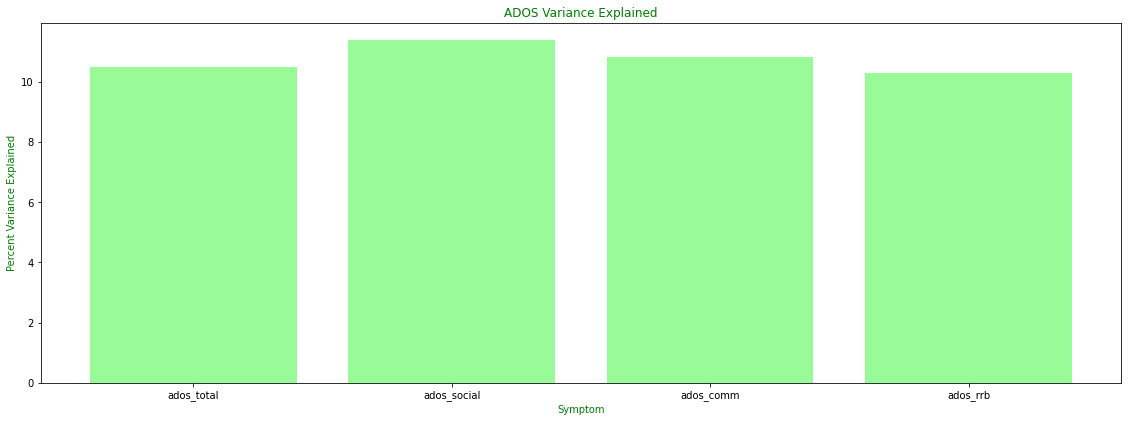

In [75]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ados_label = ['ados_total','ados_social','ados_comm','ados_rrb']
var_explained = total, comm, social, rrb
plt.bar(ados_label,var_explained,color='palegreen')
plt.title('ADOS Variance Explained',color='g')
plt.ylabel('Percent Variance Explained',color='g')
plt.xlabel('Symptom',color='g')

In [76]:
#correlation coefficents for ados_total
coefficient_total = regression_total.coef_
labels = ['TXNRD2','USP41','COMT','CRKL','TSSK2','DGCR5','TRMT2A','GP1BB','GSC2','ZDHHC8','SERPIND1','MED15','DGCR8','GNB1L','MRPL40','RTN4R','ARVCF','PRODH','RANBP1','KLHL22','DGCR6L','SCARF2','SLC7A4','SLC25A1','TBX1','CLDN5','HIRA','UFD1L','ZNF74','C22orf39','AIFM3','LZTR1','CLTCL1','CDC45','P2RX6','SNAP29','DGCR2']
print(column_total)
print()
for i in range(0,ngenes):
    print(f'{labels[i]},{coefficient_total[i]}')

ados_total

TXNRD2,16.609189979438778
USP41,3.3260088579928078
COMT,-0.45137589357092045
CRKL,-13.161317837782772
TSSK2,-9.31463745683533
DGCR5,-9.741009273615841
TRMT2A,-11.018843717025915
GP1BB,1.1547670442942193
GSC2,-0.3390128392474054
ZDHHC8,-3.131889251271431
SERPIND1,7.941032552317275
MED15,-11.074861760194228
DGCR8,-11.117765700673784
GNB1L,17.28328094296953
MRPL40,-5.489226414373062
RTN4R,19.36100978382918
ARVCF,-11.445899737811228
PRODH,-3.481939139816753
RANBP1,7.743020112706906
KLHL22,-27.289208045875483
DGCR6L,-3.09170334414234
SCARF2,-4.2688504152663445
SLC7A4,-5.433757741443284
SLC25A1,-3.1112473498250757
TBX1,-9.556066853526367
CLDN5,20.400763201957403
HIRA,10.743182791694338
UFD1L,6.893639243133851
ZNF74,11.409665202692409
C22orf39,10.856748615653482
AIFM3,16.01599336446659
LZTR1,2.994875827238649
CLTCL1,5.486669057662751
CDC45,-12.239809787962606
P2RX6,2.736455170261351
SNAP29,-11.940307551734167
DGCR2,-9.560576157006565


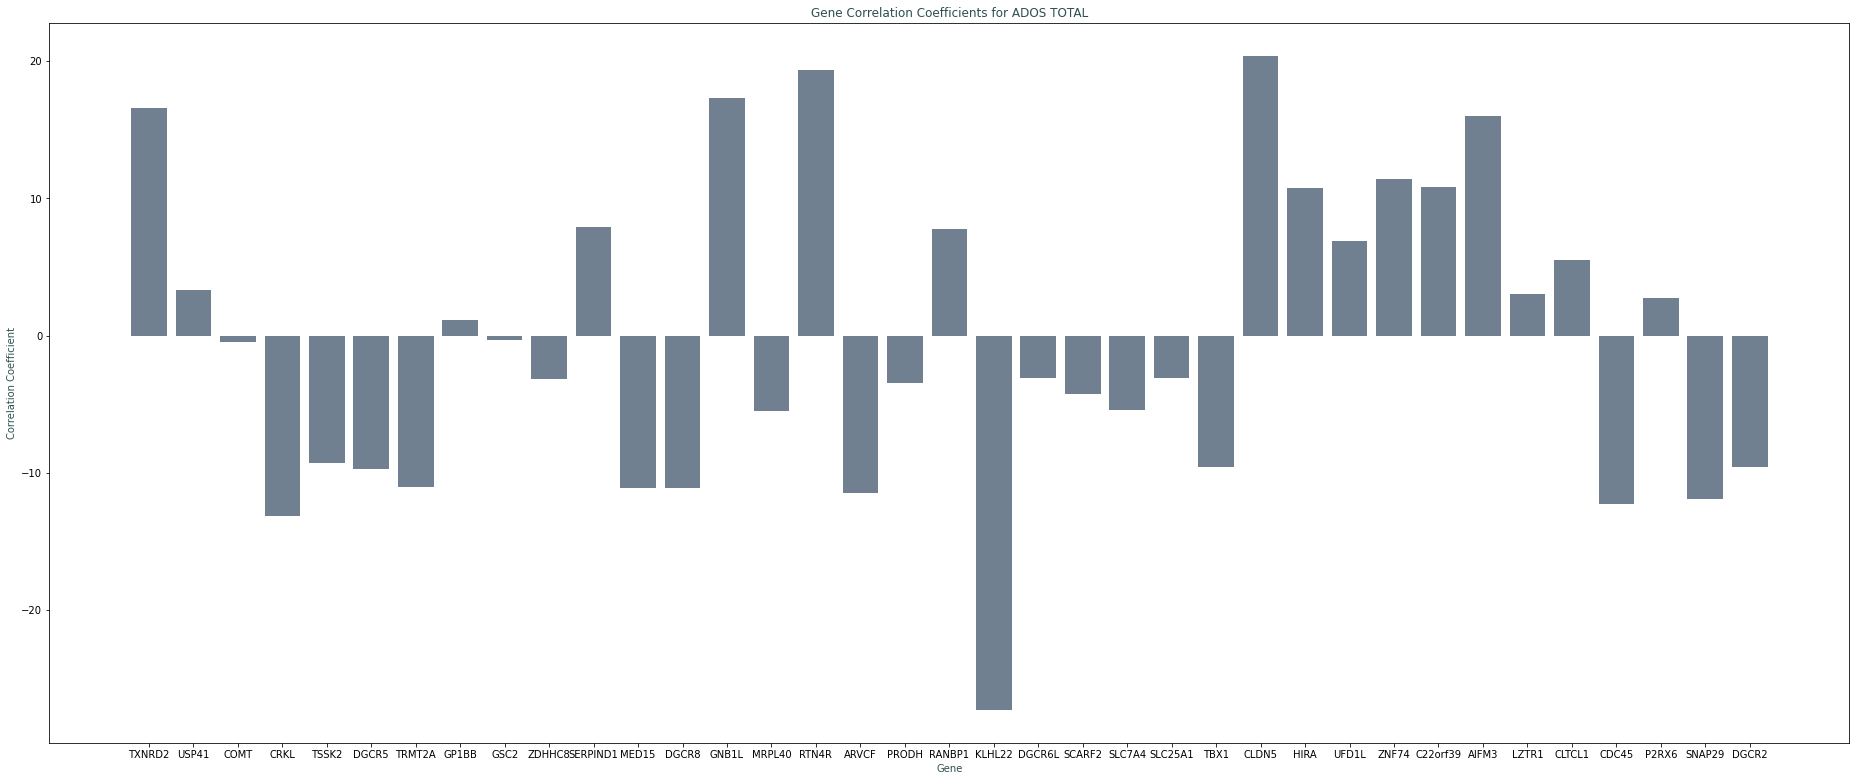

In [77]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_total,color='slategray')
plt.title('Gene Correlation Coefficients for ADOS TOTAL',color='darkslategray')
plt.ylabel('Correlation Coefficient',color='darkslategray')
plt.xlabel('Gene',color='darkslategray')
plt.show()

In [78]:
#correlation coefficents for ados_comm
coefficient_comm = regression_comm.coef_
print(column_comm)
print()
for i in range(0,ngenes):
    print(f'{labels[i]},{coefficient_comm[i]}')

ados_comm

TXNRD2,5.427430402045458
USP41,1.1871931796340947
COMT,2.7619777904672214
CRKL,-2.6561852021574586
TSSK2,-0.6540791572488969
DGCR5,-0.10035859738279347
TRMT2A,-7.673578722279795
GP1BB,-2.314450409122115
GSC2,-1.0562969994386258
ZDHHC8,2.6903921377887388
SERPIND1,1.5743791848185686
MED15,-2.525224289583755
DGCR8,-2.2844730444141144
GNB1L,3.9963545999001555
MRPL40,-1.863090058119504
RTN4R,11.831950335567216
ARVCF,-0.4329469375495566
PRODH,-4.187817169319788
RANBP1,1.832945555293888
KLHL22,-11.15822460845375
DGCR6L,0.6370889224075769
SCARF2,-6.156778479589615
SLC7A4,2.0571582841276665
SLC25A1,-1.2155049982978914
TBX1,-10.230881969147013
CLDN5,5.859236743344844
HIRA,5.238615397549788
UFD1L,0.8791937957953454
ZNF74,1.748790961189217
C22orf39,5.387997544337705
AIFM3,4.952145349346835
LZTR1,-1.505503425774525
CLTCL1,0.3297376416131092
CDC45,-1.239182053015801
P2RX6,4.495693315843605
SNAP29,-5.831027728338742
DGCR2,-2.3379153341187777


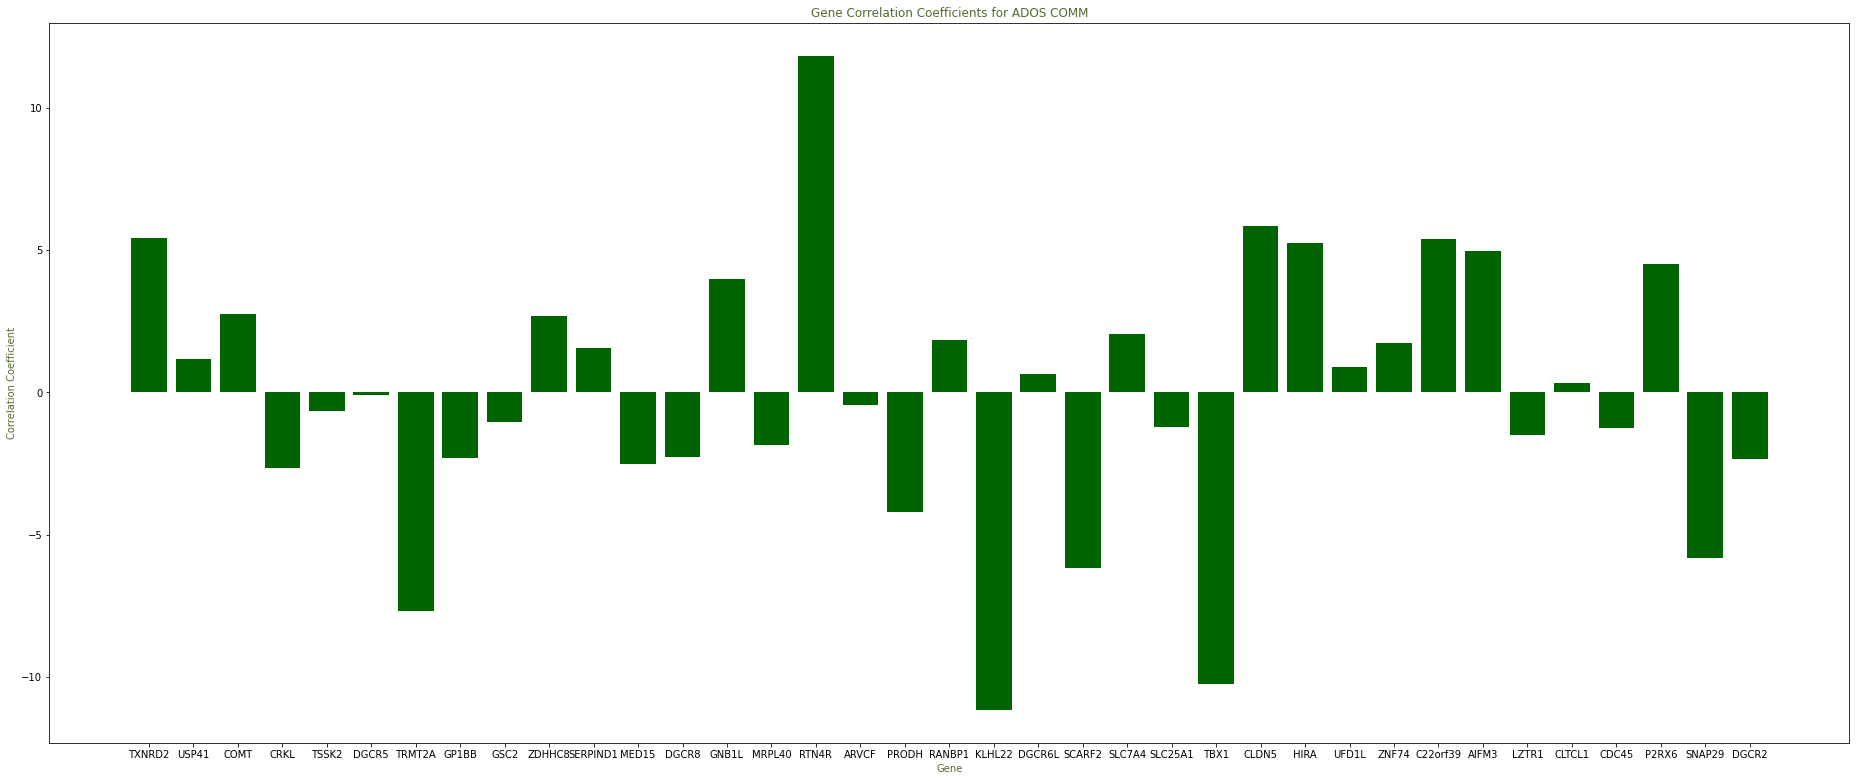

In [79]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_comm,color='darkgreen')
plt.title('Gene Correlation Coefficients for ADOS COMM',color='darkolivegreen')
plt.ylabel('Correlation Coefficient',color='darkolivegreen')
plt.xlabel('Gene',color='darkolivegreen')
plt.show()

In [80]:
#correlation coefficents for ados_social
coefficient_social = regression_social.coef_
print(column_social)
print()
for i in range(0,ngenes):
    print(f'{labels[i]},{coefficient_social[i]}')

ados_social

TXNRD2,11.258846574978486
USP41,2.350786394186891
COMT,1.6819894188926272
CRKL,-10.208241802737703
TSSK2,-7.142691314393995
DGCR5,-8.898444575414132
TRMT2A,-3.9223652071903508
GP1BB,4.403088087889994
GSC2,-0.7162932769161671
ZDHHC8,-5.29691310732772
SERPIND1,7.101328959584693
MED15,-9.828575259126143
DGCR8,-10.07050409806292
GNB1L,15.50224645291794
MRPL40,-5.711711431907255
RTN4R,5.604687206744995
ARVCF,-9.501553493880456
PRODH,-1.0264115139409258
RANBP1,7.494204892311222
KLHL22,-19.10476654268667
DGCR6L,-2.824253610400814
SCARF2,1.8101037723873488
SLC7A4,-4.151640489320456
SLC25A1,-1.1635568132354612
TBX1,-3.6130120271737614
CLDN5,16.28530646069837
HIRA,8.492297979014058
UFD1L,4.778420345891434
ZNF74,7.895794968635983
C22orf39,7.873144314629487
AIFM3,10.610208086371175
LZTR1,5.090225632014936
CLTCL1,3.478188246043082
CDC45,-9.186774889319564
P2RX6,-0.5317222187538962
SNAP29,-9.18239310557003
DGCR2,-5.906298118276771


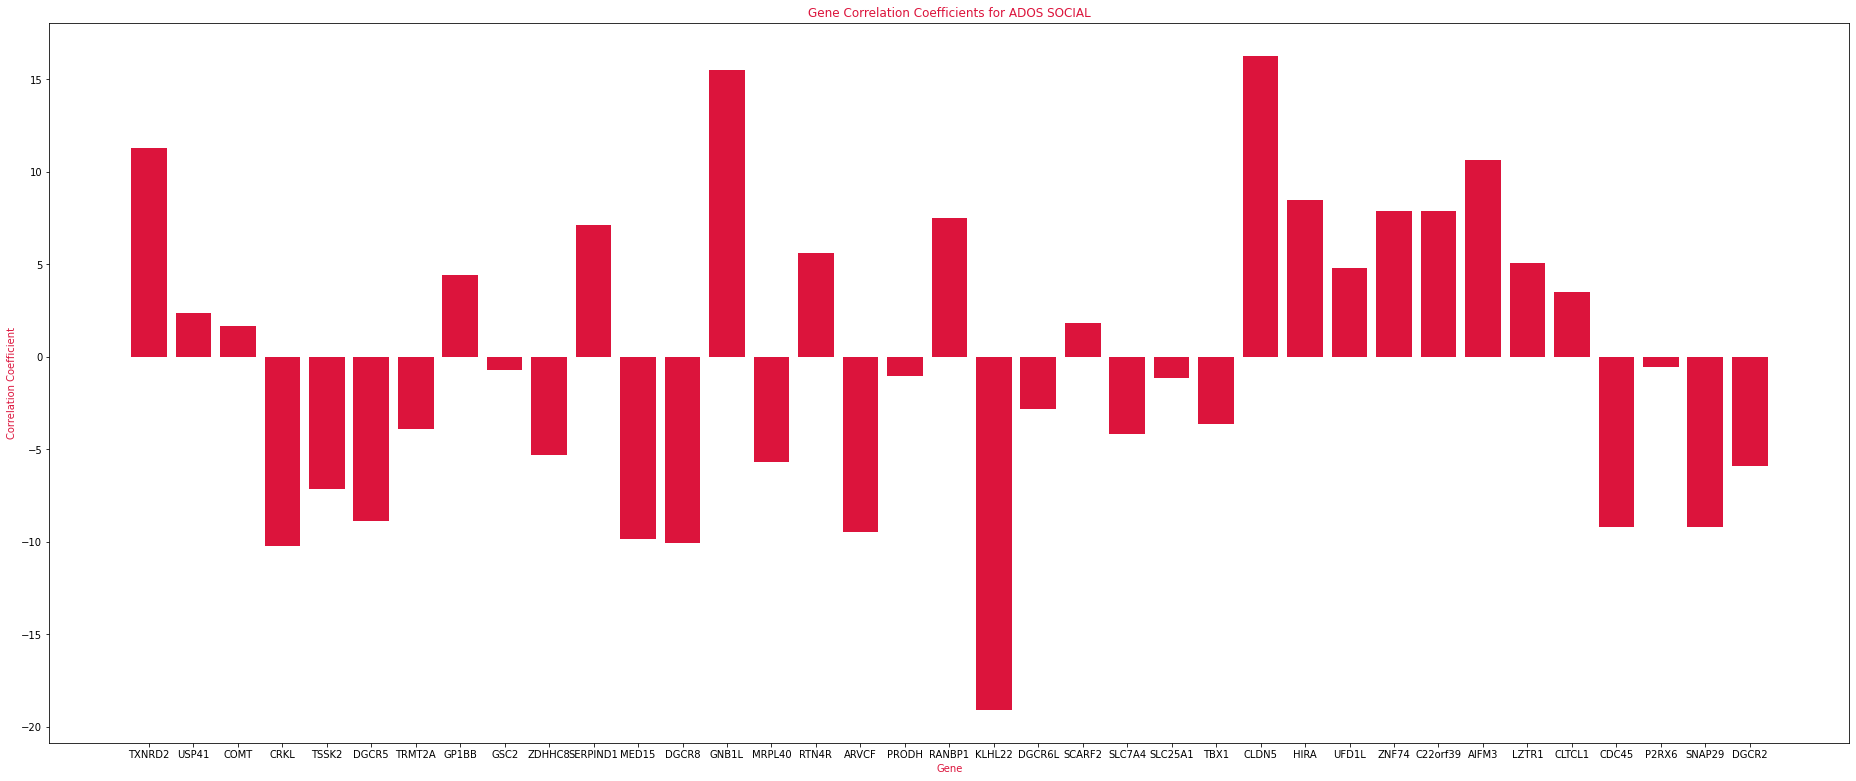

In [81]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_social,color='crimson')
plt.title('Gene Correlation Coefficients for ADOS SOCIAL',color='crimson')
plt.ylabel('Correlation Coefficient',color='crimson')
plt.xlabel('Gene',color='crimson')
plt.show()

In [82]:
#correlation coefficents for ados_rrb
coefficient_rrb = regression_rrb.coef_
print(column_rrb)
print()
for i in range(0,ngenes):
    print(f'{labels[i]},{coefficient_rrb[i]}')

ados_rrb

TXNRD2,9.871172043414846
USP41,-0.6672673670176565
COMT,-3.1721956777887876
CRKL,3.2839766919220756
TSSK2,3.5383064602599297
DGCR5,-1.8904851179193887
TRMT2A,4.313518664614037
GP1BB,3.0572569349537075
GSC2,0.25930108966846266
ZDHHC8,-5.032964019749602
SERPIND1,0.8164841126509514
MED15,-6.769036186691594
DGCR8,-2.759843832012009
GNB1L,2.6055784986505466
MRPL40,3.909057361299185
RTN4R,-3.7960662997541483
ARVCF,-5.43905839363203
PRODH,3.7841893275274474
RANBP1,-1.1309454616294115
KLHL22,-1.5070829601399263
DGCR6L,-4.961066189082118
SCARF2,5.924515722440662
SLC7A4,-7.093687195023302
SLC25A1,0.0888826965138797
TBX1,-5.695646956421019
CLDN5,2.640194463043138
HIRA,1.7551874257089994
UFD1L,2.526455741541444
ZNF74,-2.6817863509887676
C22orf39,2.21223205202378
AIFM3,7.571975377401219
LZTR1,1.5180652195304676
CLTCL1,7.124044743760218
CDC45,-8.364408805528216
P2RX6,-4.4420985643865905
SNAP29,0.8563843619397402
DGCR2,-3.96944541824091


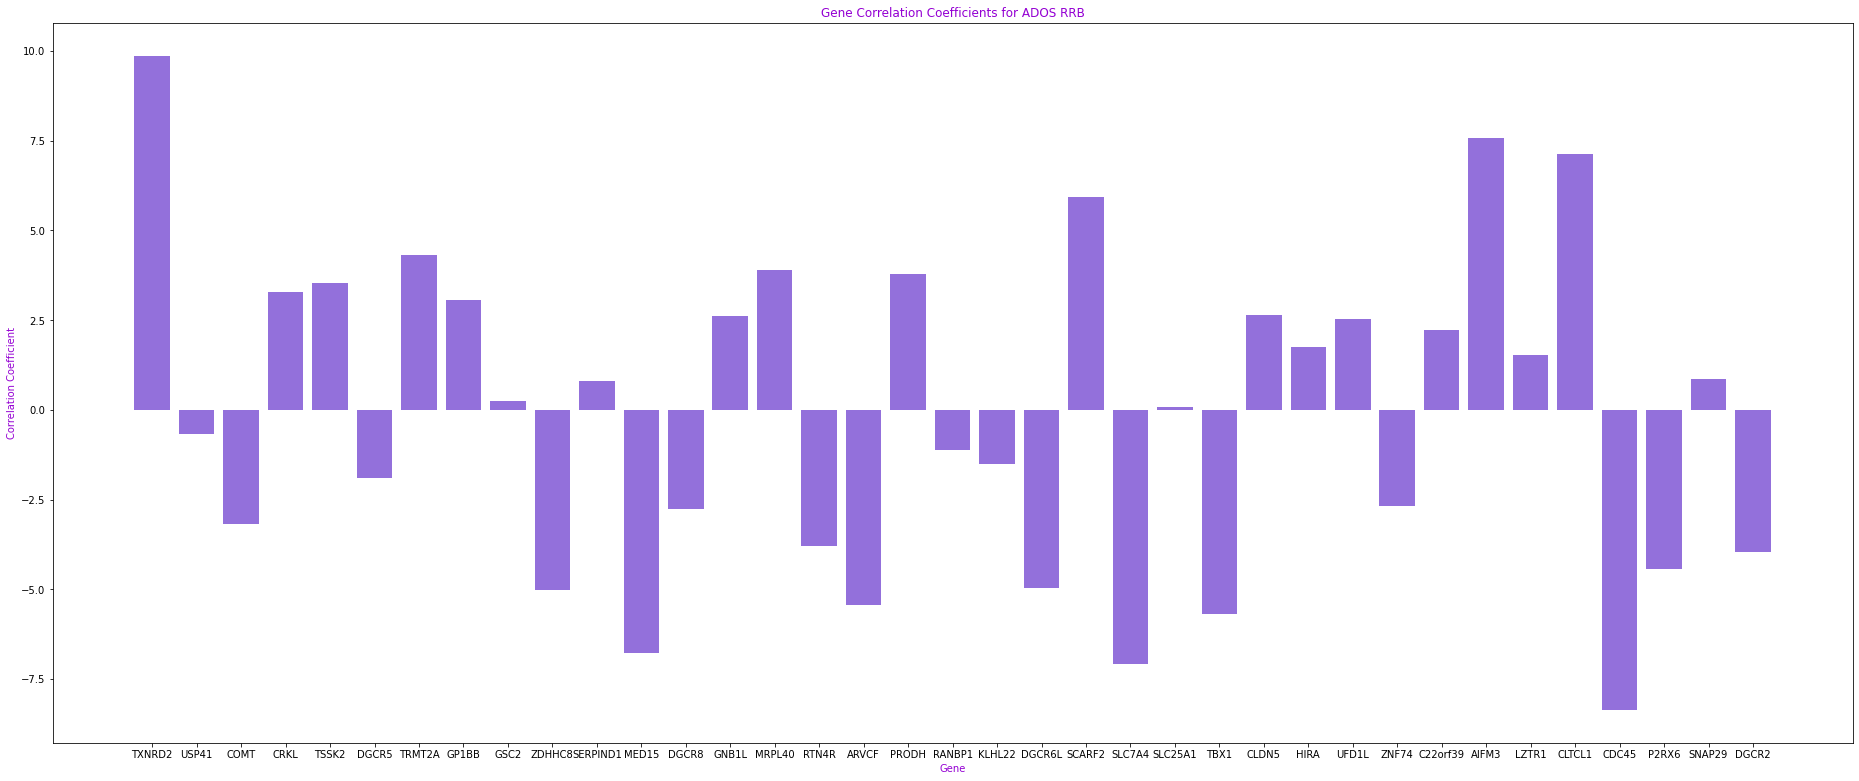

In [83]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_rrb,color='mediumpurple')
plt.title('Gene Correlation Coefficients for ADOS RRB',color='darkviolet')
plt.ylabel('Correlation Coefficient',color='darkviolet')
plt.xlabel('Gene',color='darkviolet')
plt.show()

In [84]:
#significance of coefficients for ados_total
print('ADOS_TOTAL')
X_total = X_use_total.copy()
Y_total = Y_use_total.copy()
X_total = sm.add_constant(X_total)
print(X_total.shape)
print(Y_total.shape)

est_total = sm.OLS(Y_total, X_total)
est2_total = est_total.fit()
print(est2_total.summary())

ADOS_TOTAL
(429, 38)
(429,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.239
Date:                Sat, 05 Nov 2022   Prob (F-statistic):              0.166
Time:                        16:33:50   Log-Likelihood:                -1166.0
No. Observations:                 429   AIC:                             2408.
Df Residuals:                     391   BIC:                             2562.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6937   

In [85]:
def plot_errorbar_from_table(est2_total,labels):
    coef_total = est2_total.params[1::]
    ci_total = est2_total.conf_int()[1::,:]
    ci_rel_total = abs(np.vstack((coef_total,coef_total)).transpose() - ci_total)
    ci_rel_total = ci_rel_total.transpose()
    xs_total = np.arange(len(coef_total))

    plt.figure(figsize=(30,10))
    plt.bar(xs_total,coef_total,color='thistle')
    plt.errorbar(xs_total,coef_total,ci_rel_total,fmt='r ',capsize=10,ecolor='indigo')
    plt.xticks(xs_total,labels=labels);

Text(0.5, 0, 'Gene')

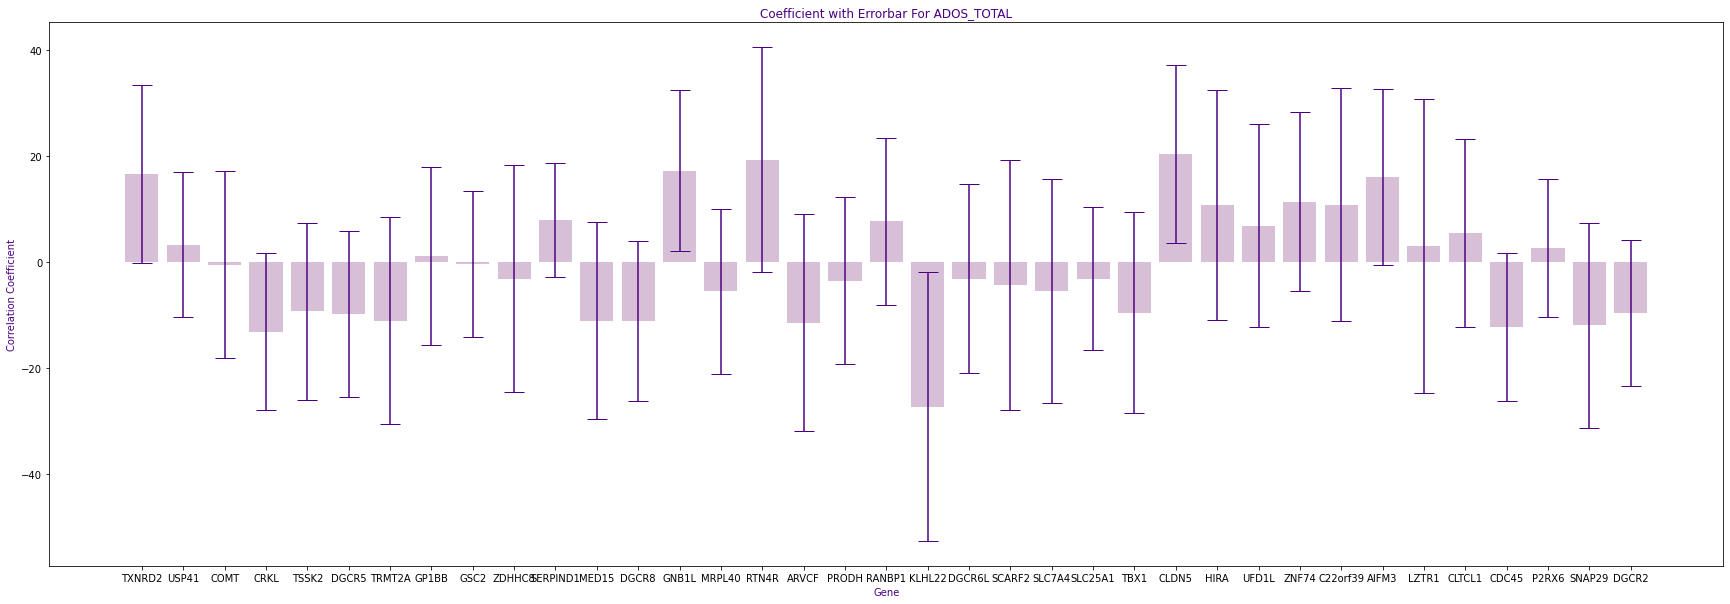

In [86]:
plot_errorbar_from_table(est2_total,labels)
plt.title('Coefficient with Errorbar For ADOS_TOTAL',color='indigo')
plt.ylabel('Correlation Coefficient',color='indigo')
plt.xlabel('Gene',color='indigo')

In [87]:
#significance of coefficients for ados_comm
print('ADOS_COMM')
X_comm = X_use_comm.copy()
Y_comm = Y_use_comm.copy()
X_comm = sm.add_constant(X_comm)

est_comm = sm.OLS(Y_comm, X_comm)
est2_comm = est_comm.fit()
print(est2_comm.summary())

ADOS_COMM
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.296
Date:                Sat, 05 Nov 2022   Prob (F-statistic):              0.122
Time:                        16:33:50   Log-Likelihood:                -749.76
No. Observations:                 411   AIC:                             1576.
Df Residuals:                     373   BIC:                             1728.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3719      0.147     22.94

In [88]:
def plot_errorbar_from_table(est2_comm,labels):
    coef_comm = est2_comm.params[1::]
    ci_comm = est2_comm.conf_int()[1::,:]
    ci_rel_comm = abs(np.vstack((coef_comm,coef_comm)).transpose() - ci_comm)
    ci_rel_comm = ci_rel_comm.transpose()
    xs_comm = np.arange(len(coef_comm))

    plt.figure(figsize=(30,10))
    plt.bar(xs_comm,coef_comm,color='lightgrey')
    plt.errorbar(xs_comm,coef_comm,ci_rel_comm,fmt='r ',capsize=10,ecolor='darkslategray')
    plt.xticks(xs_comm,labels=labels);

Text(0.5, 0, 'Gene')

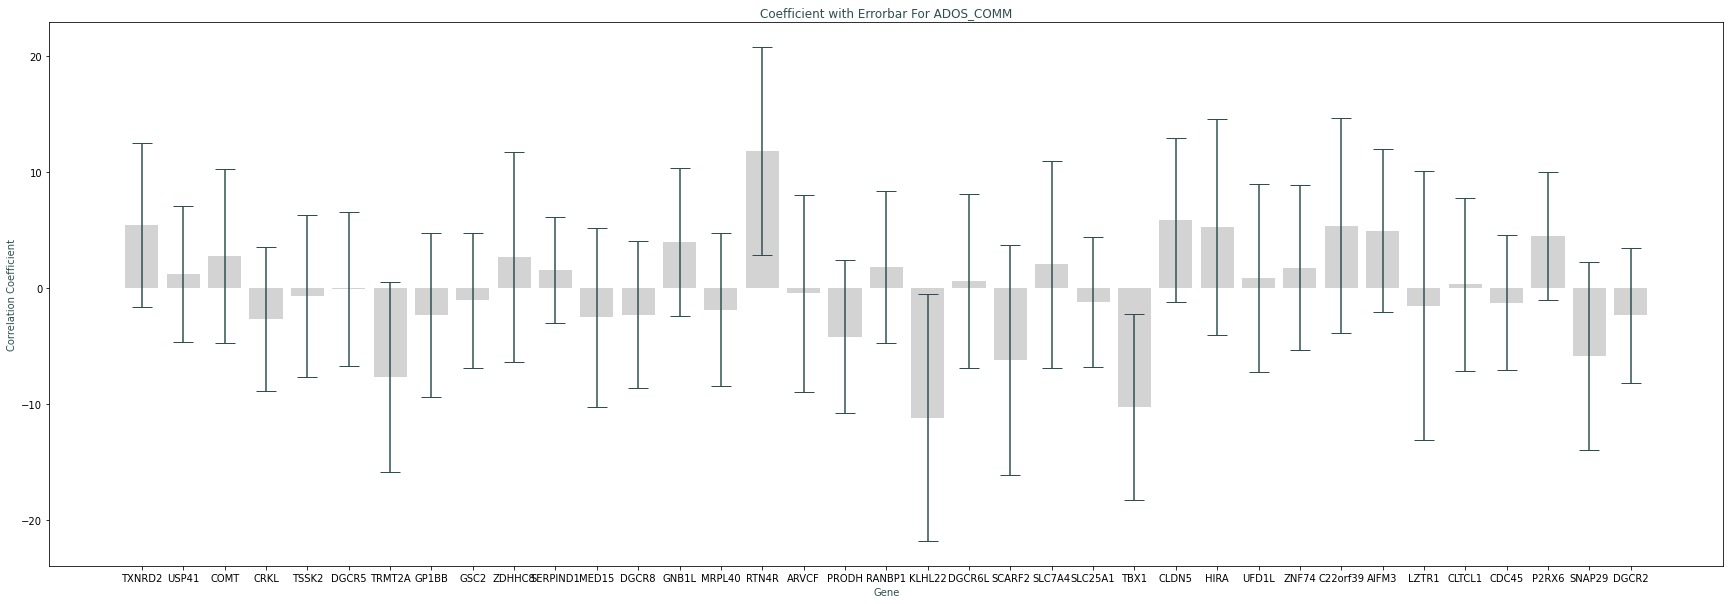

In [89]:
plot_errorbar_from_table(est2_comm,labels)
plt.title('Coefficient with Errorbar For ADOS_COMM',color='darkslategray')
plt.ylabel('Correlation Coefficient',color='darkslategray')
plt.xlabel('Gene',color='darkslategray')

In [90]:
#significance of coefficients for ados_social
print('ADOS_SOCIAL')
X_social = X_use_social.copy()
Y_social = Y_use_social.copy()
X_social = sm.add_constant(X_social)

est_social = sm.OLS(Y_social, X_social)
est2_social = est_social.fit()
print(est2_social.summary())

ADOS_SOCIAL
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.226
Date:                Sat, 05 Nov 2022   Prob (F-statistic):              0.178
Time:                        16:33:50   Log-Likelihood:                -974.69
No. Observations:                 412   AIC:                             2025.
Df Residuals:                     374   BIC:                             2178.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1393      0.253     28.

In [91]:
def plot_errorbar_from_table(est2_social,labels):
    coef_social = est2_social.params[1::]
    ci_social = est2_social.conf_int()[1::,:]
    ci_rel_social = abs(np.vstack((coef_social,coef_social)).transpose() - ci_social)
    ci_rel_social = ci_rel_social.transpose()
    xs_social = np.arange(len(coef_social))

    plt.figure(figsize=(30,10))
    plt.bar(xs_social,coef_social,color='skyblue')
    plt.errorbar(xs_social,coef_social,ci_rel_social,fmt='r ',capsize=10,ecolor='steelblue')
    plt.xticks(xs_social,labels=labels);

Text(0.5, 0, 'Gene')

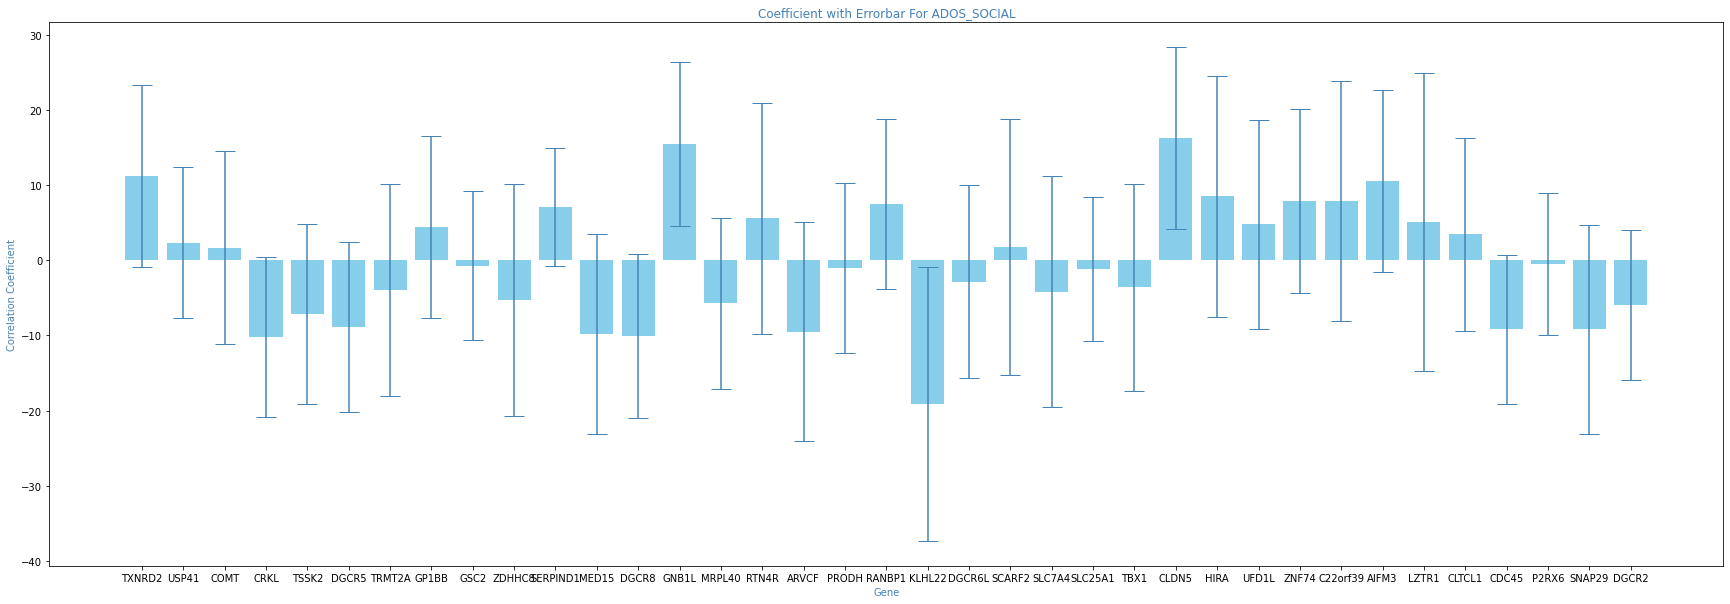

In [92]:
plot_errorbar_from_table(est2_social,labels)
plt.title('Coefficient with Errorbar For ADOS_SOCIAL',color='steelblue')
plt.ylabel('Correlation Coefficient',color='steelblue')
plt.xlabel('Gene',color='steelblue')

In [93]:
#significance of coefficients for ados_rrb
print('ADOS_RRB')
X_rrb = X_use_rrb.copy()
Y_rrb = Y_use_rrb.copy()
X_rrb = sm.add_constant(X_rrb)

est_rrb = sm.OLS(Y_rrb, X_rrb)
est2_rrb = est_rrb.fit()
print(est2_rrb.summary())

ADOS_RRB
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.044
Date:                Sat, 05 Nov 2022   Prob (F-statistic):              0.405
Time:                        16:33:51   Log-Likelihood:                -670.91
No. Observations:                 375   AIC:                             1418.
Df Residuals:                     337   BIC:                             1567.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8146      0.149     12.171

In [94]:
def plot_errorbar_from_table(est2_rrb,labels):
    coef_rrb = est2_rrb.params[1::]
    ci_rrb = est2_rrb.conf_int()[1::,:]
    ci_rel_rrb = abs(np.vstack((coef_rrb,coef_rrb)).transpose() - ci_rrb)
    ci_rel_rrb = ci_rel_rrb.transpose()
    xs_rrb = np.arange(len(coef_rrb))

    plt.figure(figsize=(30,10))
    plt.bar(xs_rrb,coef_rrb,color='pink')
    plt.errorbar(xs_rrb,coef_rrb,ci_rel_rrb,fmt='r ',capsize=10,ecolor='mediumvioletred')
    plt.xticks(xs_rrb,labels=labels);

Text(0.5, 0, 'Gene')

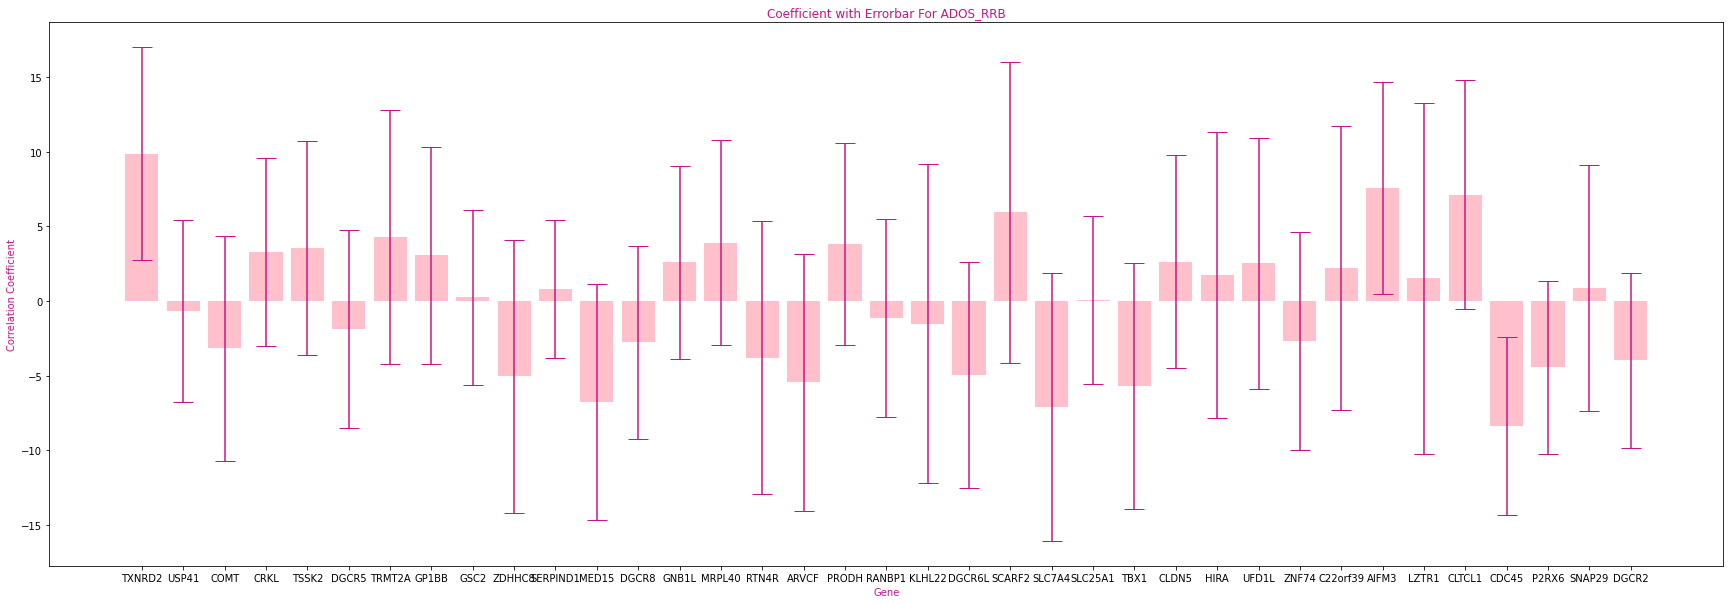

In [95]:
plot_errorbar_from_table(est2_rrb,labels)
plt.title('Coefficient with Errorbar For ADOS_RRB',color='mediumvioletred')
plt.ylabel('Correlation Coefficient',color='mediumvioletred')
plt.xlabel('Gene',color='mediumvioletred')